In [13]:
import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
files = ['C/times.dat','../fftw_es1/C/times.dat']

In [15]:

lines = []
data_frames = []
n_line = 0
for index in range(len(files)):
	with open(files[index]) as file:	
		for line in file.readlines():
			lines += [line.split()]
			n_line+=1

	for i in range(len(lines[0])):
		lines[0][i] = lines[0][i].replace(",","")

	#for line in lines[1:]:
	#	line[1:] = (np.array(line[1:])).astype(np.double) 

	#lines =  lines[0:len(lines)-3]
	df = pd.DataFrame(lines[1:])
	df.columns = lines[0]
	data_frames.append(df)
	lines = []

for i in data_frames:
	display(i)
	print(i.to_markdown())

,grid_size,n_proc_tot,time
0,512x512x1024,32,919.125449895859
1,512x512x1024,64,600.446949005127
2,512x512x1024,128,374.573275089264
3,512x512x1024,256,255.415284872055


|    | grid_size    |   n_proc_tot |    time |
|---:|:-------------|-------------:|--------:|
|  0 | 512x512x1024 |           32 | 919.125 |
|  1 | 512x512x1024 |           64 | 600.447 |
|  2 | 512x512x1024 |          128 | 374.573 |
|  3 | 512x512x1024 |          256 | 255.415 |


,grid_size,n_proc_tot,time
0,512x512x1024,32,1051.173555850983
1,512x512x1024,64,659.826063156128
2,512x512x1024,128,454.704920053482
3,512x512x1024,256,276.521547079086


|    | grid_size    |   n_proc_tot |     time |
|---:|:-------------|-------------:|---------:|
|  0 | 512x512x1024 |           32 | 1051.17  |
|  1 | 512x512x1024 |           64 |  659.826 |
|  2 | 512x512x1024 |          128 |  454.705 |
|  3 | 512x512x1024 |          256 |  276.522 |


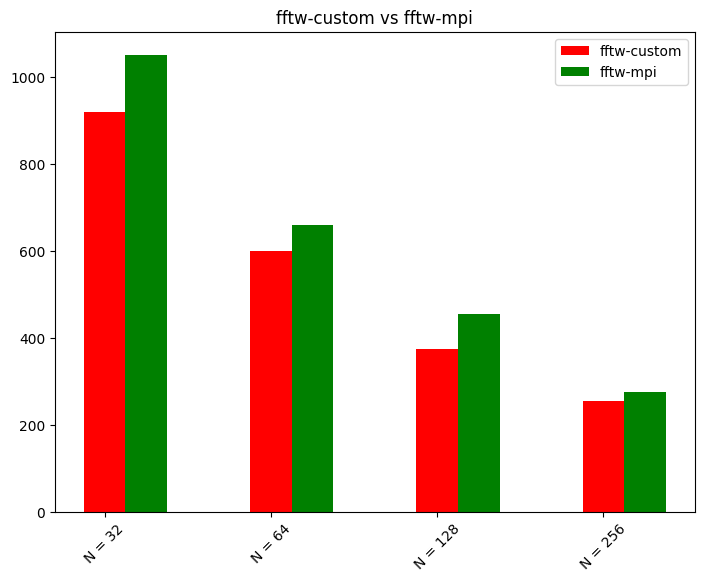

In [19]:
def plot(data_array):
    X = np.arange(len(df["n_proc_tot"]))
    X_ticks = [0,1,2,3]
    ticks = ['N = ' + str(size) for size in data_array[0]["n_proc_tot"]]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.bar(X , pd.to_numeric(data_array[0]["time"]), color = 'r', width = 0.25)
    ax.bar(X+0.25 , pd.to_numeric(data_array[1]["time"]), color = 'g', width = 0.25)


    ax.set_xticks(X_ticks, ticks)
    ax.legend(labels=['fftw-custom',  'fftw-mpi'])

    plt.xticks(fontsize=10, rotation=45)
    plt.title('fftw-custom vs fftw-mpi')
    plt.show()

  
plot(data_frames)